# Multidimensional Scaling
This is the second part in *Manifold Learning: Introduction and Foundational Algorithms*, and the entire project can be viewed at https://github.com/drewwilimitis/Manifold-Learning <br>
<br>
`Drew Wilimitis`

**Multidimensional scaling** (MDS) is an algorithm used for dimensionality reduction, and is most often applied to visualize the similarities in datasets. Although MDS can be considered as a manifold learning algorithm, in general we will see that MDS uses a linear projection, and that the Classical MDS algorithm is equivalent to Principal Component Analysis (PCA). MDS was one of the earliest developed methods for dimensionality reduction, and it has broad applications for high dimensional data in genetics, psychology, sociology, political science, ecology, and many other domains related to modeling structural relationships between objects and conveying their similarities spatially [<sup>1</sup>](#fn1). <br>
<br>
Multidimensional scaling uses pairwise similarity measures (which can be similarity measures of any kind, even qualitative ratings of similarity) to construct a spatial representation that keeps similar objects close together and dissimilar objects further apart. In this way, the goal is to capture the structure of the higher dimensional data in a lower dimensional representation.  

Here's a few examples from the social sciences:

![title](https://user-images.githubusercontent.com/16658498/56078898-bbedda80-5db2-11e9-836f-10ee92766e51.gif)
<font size =2.95>
The figure shows an application of multidimensional scaling in clinical psychology - the spatial representation illustrates dimensions of repetitive thought. The horizontal axis 'Valence' reflects whether the content of thoughts is positive or negative. The vertical axis 'Purpose' reflects whether the tone of thoughts is searching, questioning, and/or uncertain (negative numerical values) or largely solving, planning, and/or certain (positive numerical values). Notice that similar types are close together (self-analysis, reflection) and dissimilar types are further apart (reminiscing, worry). Source: https://www.apa.org/science/about/psa/2011/03/repetitive-thought </font>

![title](https://user-images.githubusercontent.com/16658498/56078899-c0b28e80-5db2-11e9-8f35-b680e7404af9.png)

<font size =2.95> This figure shows Multidimensional scaling applied to voting patterns of Democrats (blue dots) and Republicans (red dots) in the US House of Representatives. Source: https://en.wikipedia.org/wiki/Multidimensional_scaling#Types <font>

**Goal**: MDS differs from many other dimensionality reduction methods in that the input to MDS is only the dissimilarity matrix, instead of the actual position vectors of the data. Given a pairwise dissimilarity matrix $D$ with entries $d_{ij}$ for the distance/dissimilarity between observations $i$ and $j$, we find $x_1, ..., x_n \in \mathbb{R}^k$ such that: <br>
<br>
$$\underbrace{d_{ij}^2}_{\text{original distances}} \approx \underbrace{||x_{i} - x_{j}||^2}_{\text{output configuration}}$$
<br>
We find a configuration (typically a lower dimensional configuration in $\mathbb{R}^2$) that keeps the Euclidean distances in $\mathbb{R}^k$ as close as possible to our original distances/similarities. <br>
<br>
**Note:** MDS considers global similarities by attempting to preserve all the pairwise distances (instead of preserving local neighborhood similarities like many other manifold learning algorithms), and this limits the ability of MDS to produce non-linear embeddings. <br>
<br>
**Note:** the original distances in $D$ do not have to be Euclidean distances. They can be pairwise dissimilarities, even for qualitative comparisons between any type of objects. The algorithm will be slightly modified when the original distances are Euclidean (classical MDS) vs. non-Euclidean or even direct qualitative similarities (general metric or non-metric MDS).

### Algorithm Outline (Classical MDS): 
**Input:** Pairwise distances/dissimilarities for n objects given by matrix $D \in \mathbb{R}^{n \times n}$ with entries $d_{ij}$, with one parameter k (specified output dimension)<br>
**Output:** Configuration vectors $x_1, ..., x_n \in \mathbb{R}^k$
<br>
**Steps**: <br>
1. Compute Gram matrix & double centering: from the pairwise dissimilarity matrix find Gram matrix $B \in \mathbb{R}^{n \times n}$ where we double center with $B = \frac{-1}{2} C_n D^{2} C_{n}$<br>
2. Find eigenvalues and eigenvectors: Find eigenvalues $\lambda$ and eigenvectors $\mathbf{v}$ of Gram matrix and form matrices $\mathbf{\Lambda}_{n}=\operatorname{diag}\left(\lambda_{1}, \ldots, \lambda_{n}\right)$ and $\boldsymbol{V}_{n}=\left(\boldsymbol{v}_{1}, \ldots, \boldsymbol{v}_{n}\right)$
3. Lower dimensional embedding:  use the top k eigenvectors $v_1, ..., v_k$ (with the largest eigenvalues) and decomposition $X = V_{k} \sqrt{\Lambda}_{k} $ to form matrix $X = (x_1, \ldots, x_n)^{T}$ with lower dimensional output vectors $x_i \in \mathbb{R}^k$

**Classical MDS:** When the original distances are Euclidean, we use classical multidimensional scaling and we try to find a configuration so that the configured distances are approximately equal to the original Euclidean distances.

## Step 1: Double Centering and the Gram Matrix

To find the matrix $X$ with the output coordinates, we use the fact that the $n\times n$ Gram matrix $B$ will be defined by the inner products of $X$. <br>
<br>
$$\underbrace{\mathbf{B}}_{n\times n} = \underbrace{\mathbf{X}}_{n\times k} \cdot \underbrace{\mathbf{X}^T}_{k\times n}$$ <br>
Which we write out explicitly as <br>
<br>
$$\mathbf{B} = \mathbf{X X^T} = \begin{bmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,k} \\
x_{2,1} & x_{2,2} & \cdots & x_{2,k} \\
\vdots & \vdots & \vdots & \vdots \\
x_{n,1} & x_{n,2} & \cdots & x_{n,k}
\end{bmatrix} 
\begin{bmatrix}
x_{1,1} & x_{2,1} & \cdots & x_{n,1} \\
x_{1,2} & x_{2,2} & \cdots & x_{n,2} \\
\vdots & \vdots & \vdots & \vdots \\
x_{1,k} & x_{2,k} & \cdots & x_{n,k}
\end{bmatrix}$$ <br>
<br>
The entries of $B$ are given by $b_{ij} = \langle x_i , x_j \rangle = \sum_{k} x_{ik} x_{jk}$. The expression of the gram matrix involving output configuration $X$ is only shown here to illustrate that once we compute the gram matrix, we can then derive the output vectors. However, we will obviously have to use our only input, the dissimilarity matrix, in order to find the gram matrix $B$. 

**Important detail/constraint**: The configuration of our solution will not be unique, as arbitrary translations, rotations, and reflections will not affect the pairwise distances. For example, if we have the solution as matrix $X = [x_1, \ldots, x_n]^{T}$, then we also have the solution $X^* = [x_1 + c, \ldots, x_n + c]^{T}$, translated by some vector $c \in \mathbb{R}^k$: <br>
<br>
$$
\begin{equation}
\begin{aligned}
d_{ij}^2 & \approx ||x_{i} - x_{j}||^2 & \text{since X is a solution}\\
\\
            & = ||(x_{i} + c) - (x_{j} + c)||^2\\
\\
            & = ||x^*_{i} - x^*_{j}||^2\\
\end{aligned}
\end{equation}
$$

Therefore, we must also have $d_{ij}^2 \approx ||x^*_{i} - x^*_{j}||^2$. <br>
<br>
The configurations that result from an arbitrary translation will all be solutions, and similar arguments can show that the pairwise distances will also be unaffected by rotations and reflections. Intuitively, the reasoning is that the distances are only defined pairwise, and not in terms of a global coordinate system.

### Double Centering

To incorporate the translational invariance, we need to center the gram matrix around 0 by subtracting the column and row means from every entry. Double centering is a technique that uses the centering matrix $C_n$: <br>
<br>
$$C_{n} = I_{n} - \frac{1}{n} \mathbf{1}\mathbf{1^T}$$ <br>
where $I_{n}$ is the Identity matrix for dimension $n$, $\mathbf{1}$ is a column vector of n ones, and $\mathbf{1}\mathbf{1^T}$ gives the $n\times n$ matrix of all ones.

For example, $$C_{2} = \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix} - \frac{1}{2} \begin{bmatrix}
1 & 1 \\
1 & 1
\end{bmatrix} = \begin{bmatrix}
1/2 & -1/2 \\
-1/2 & 1/2
\end{bmatrix} $$

For some matrix $X \in \mathbb{R}^{n \times n}$: $C_{n} X$ subtracts the column means from the entries of $X$, and $X C_{n}$ subtracts the row means from every entry of $X$. Hence, the operation $C_{n}X C_{n}$ removes both row and column means and is referred to as double centering.

We now generate some data and demonstrate the use of the centering matrix in python:

In [6]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plotting style
%matplotlib inline
plt.style.use('seaborn')
# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";
# ignore warnings
import warnings
warnings.filterwarnings('ignore');

N = 100 # number of data points
u = 3 + np.random.randn(N) # first feature dimension with mean = 3
v = 7 + np.random.randn(N) # second feature dimensions with mean = 7
X = np.hstack((u.reshape(-1,1),v.reshape(-1,1))) # 100 x 2 data matrix
# view first 5 rows and the column means
X[:5,:]
print('Column 1 mean: ', np.mean(X[:, 0]))
print('Column 2 mean: ', np.mean(X[:, 1]))

array([[1.75735143, 7.60942924],
       [2.06384298, 8.36373258],
       [3.30784778, 5.83195902],
       [2.88511324, 5.35317008],
       [1.97823489, 8.02038741]])

Column 1 mean:  3.0044980230041336
Column 2 mean:  7.079762533566981


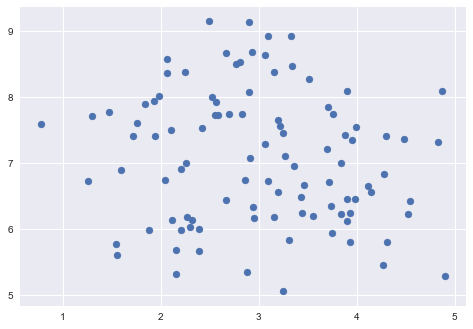

In [7]:
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.jet)
plt.show();

The data is centered around (3, 7), and we can find the pairwise distances with the scikit-learn library, and plot a heatmap to visualize a corner of the 100x100 distance matrix.

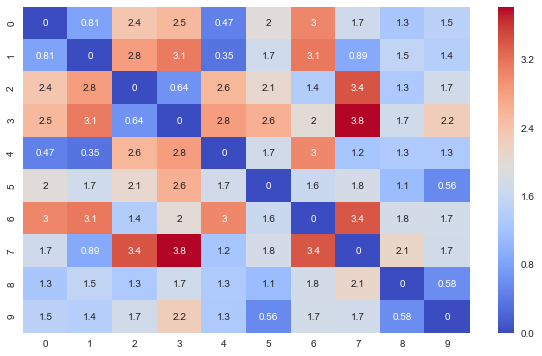

In [8]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
plt.figure(figsize=(10,6))
sns.heatmap(D[:10, :10], cmap="coolwarm", annot=True);

Notice that the distance matrix is symmetric and non-negative with zeros on the diagonal since the distance from every point to itself is zero. Now we define the centering matrix and multiply with our data matrix X to remove the column means, resulting in data centered around (0, 0).

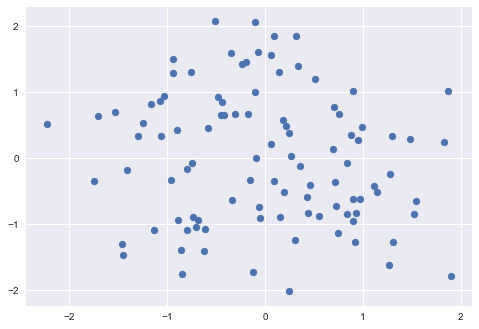

In [9]:
# function to form centering matrix
centering_matrix = lambda n: np.identity(n) -(1/n)*np.ones((n,n))
# multiply by data matrix X
X_centered = np.dot(centering_matrix(100), X)
# plot the centered data:
plt.scatter(X_centered[:, 0], X_centered[:, 1], cmap=plt.cm.jet)
plt.show();

In [10]:
# verify that the pairwise distances are unchanged
D_centered = pairwise_distances(X_centered)
np.allclose(D, D_centered)

True

**Closed Form of the Gram Matrix with Centering:** <br>
<br>
We can now succinctly state the closed matrix form of $B$ by making use of the centering matrix:
<br>
<br>
$$\boxed {B = \frac{-1}{2} C_n D^{2} C_{n}}$$ <br>
**Note:** $C_n$ is the centering matrix with $C_{n} = I_{n} - \frac{1}{n} \mathbf{1}\mathbf{1^T}$ and from the original distance matrix we have $D^{2}$ = matrix with entries ${d_{ij}^2}$

## Step 2: Find eigenvalues and eigenvectors of matrix B

Since the gram matrix $B$ is a real symmetric, positive definite matrix, we know that it will have real eigenvalues and we can use the following eigendecomposition of B in order to find an expression for our output configuration: <br>
<br>
$$
\begin{aligned}
B & = V \Lambda V^T\\
            & = {(\Lambda^\frac{1}{2} V^{T})}^T (\Lambda^\frac{1}{2} V^{T})\\
            & = X X^T & \text{(from original def. of B)}\\
\end{aligned}
$$<br>
and therefore we have
<br>
$$X = V \sqrt{\Lambda}$$ <br>
where the eigenvalues are given by diagonal matrix $\mathbf{\Lambda}=\operatorname{diag}\left(\lambda_{1}, \ldots, \lambda_{n}\right)$ and the eigenvectors are given by the following matrix with the columns set as the eigenvectors $V=\left(v_{1}, \ldots, v_{n}\right)^{T}$

## Step 3: Find coordinates of output configuration

We can now define a k-dimensional configuration by choosing the largest k eigenvalues and the corresponding eigenvectors from k columns of V: <br>
<br>
$$ \boxed{X_{k} = V_{k} \sqrt{\Lambda_{k}}}$$

where $\Lambda_{k}$ is the k x k diagonal submatrix of $\Lambda$ and $V_{k}$ is the n x k submatrix of $V$.

## Classical MDS and equivalence to PCA

Without going into the full details of Principal Component Analysis, I'll attempt to show that Classical MDS with Euclidean distances produces the same results as PCA. 

In the standard PCA approach, we have an input data matrix $X$ and (after centering the data) we find the singular value decomposition of $X$: <br>
<br>
$$
\mathbf{X}=\mathbf{U \Sigma W}^{T}
$$ <br>
where $\Sigma$ is a diagonal matrix with singular values $\sigma_{(k)}$, and matrices $U, W$ are orthogonal matrices s.t $\mathbf{W}^{T} \mathbf{W}=\mathbf{I} = \mathbf{U}^{T} \mathbf{U}$ <br>

The output $Y_k$ is produced by projecting the data onto the first $k$ principal components by multiplying $X$ and the first $k$ columns of $W$: <br>
<br>
$$\begin{aligned} \mathbf{Y_k} &= \mathbf{X} \mathbf{W_k} \\
&= \mathbf{U_k \Sigma_k W_k^{T} W_k} \\
&= \mathbf{U_k} \Sigma_k & (\text{since we have  } \mathbf{W}^{T} \mathbf{W}=\mathbf{I})\\
\end{aligned}
$$
<br>
To see the equivalence between PCA and classical MDS, consider our previous eigenvector decomposition of $X X^T$ from classical MDS. We now show that these left singular values $U_k$ are equivalent to the eigenvectors of $X X^T$, and that the singular values $\sigma_{(k)}$ of $\mathbf{X}$ are equivalent to the square root of the eigenvalues of $X X^T$. We rewrite $X X^T$ using the SVD: <br>
<br>

$$\begin{aligned} \mathbf{X} \mathbf{X}^{T} &=(\mathbf{U} \boldsymbol{\Sigma} \mathbf{W}^{T}) (\mathbf{W} \boldsymbol{\Sigma}^{T} \mathbf{U}^{T}) \\ 
&=\mathbf{U} \boldsymbol{\Sigma} \mathbf{\Sigma}^{T} \mathbf{U}^{T} & (\text{since we have  } \mathbf{W}^{T} \mathbf{W}=\mathbf{I}) \\
&= (\mathbf{U} \mathbf{\Sigma}) (\mathbf{\Sigma} \mathbf{U}^{T}) \\ 
&= V \Lambda V^T & \text{(eigendecomposition above)} \\ 
&= (V_{k} \sqrt{\Lambda_{k}}) (\sqrt{\Lambda_{k}} V^{T})\\
\end{aligned}$$ <br>

Therefore, we have: <br>
$$ \mathbf{U_k} \Sigma_k = V_{k} \sqrt{\Lambda_{k}}$$ <br>
and so finding the eigenvalue decomposition of the Gram matrix above (classical MDS) produces the same results as using the singular value decomposition and projecting onto the principal components (PCA).

## Metric vs. Non-metric MDS
There are many different variants of MDS that can be applied in different situations, and so the broad categories are only briefly covered below.

**Metric MDS** - dissimilarities are quantitative but not necessarily Euclidean (classical MDS is a special case)

For metric MDS, we have loss function defined as: <br>
<br>
$$Stress_{D}\left(x_{1}, x_{2}, \ldots, x_{N}\right)=\left(\sum_{i \neq j=1, \ldots, N}\left(d_{i j}-\left\|x_{i}-x_{j}\right\|\right)^{2}\right)^{1 / 2}
$$ <br>
We attempt to find the configuration $x_1, ..., x_n$ to minimize this error given our input matrix $D$

**Non-metric MDS** - dissimilarities are qualitative (similarity measures are interpreted more as rankings or ordinal classifications) <br>

In the non-metric case, the dissimilarity matrix we are given is only important in its relative ranking of the observations, not the quantitative degree to which observations differ. For non-metric MDS, we have a monotonic function $f$ and we find a configuration that *only preserves relative ranking of the data*. <br>
<br>
If $d_{ij} < d_{ik}, \Rightarrow f(d_{ij}) \leq f(d_{ik})$

Non-metric MDS can also be stated as the problem of finding the optimal configuration $x_1, ..., x_n \in \mathbb{R}^k$ that minimizes the following loss function: <br>
<br>
$$
Stress_{D}\left(x_{1}, x_{2}, \ldots, x_{N}\right)=\sqrt{\frac{\sum(f(x)-d)^{2}}{\sum d^{2}}}
$$

### <font color='blue'> Example - MDS and Non-linear Embeddings </font>

We use `sklearn.datasets` to generate a non-linear dataset that is often used to test manifold learning algorithms, and we use `sklearn.manifold` to apply MDS and visualize the resulting embedding.

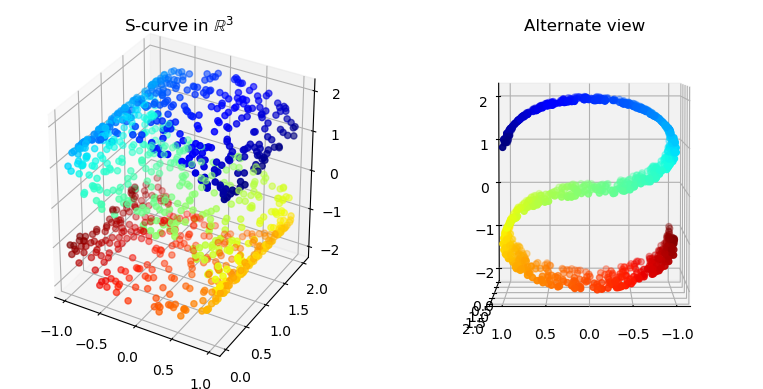

In [54]:
from sklearn.datasets.samples_generator import make_s_curve
from mpl_toolkits import mplot3d
X, color = make_s_curve(1000, random_state=0)
plt.style.use('default')
#plt.rcParams['figure.facecolor'] = 'white'

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.jet);
plt.title('S-curve in $\mathbb{R}^3$')

# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
plt.title('Alternate view')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.jet)
ax.view_init(4,90);

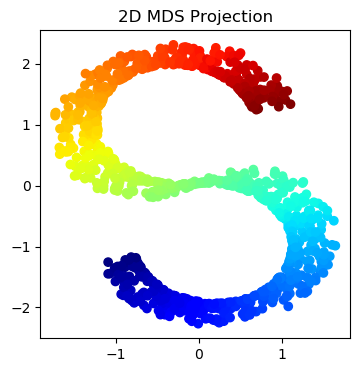

In [58]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
out = model.fit_transform(X)
fig = plt.figure(figsize=(4,4))
plt.scatter(out[:, 0], out[:, 1], c=color, cmap=plt.cm.jet)
plt.title('2D MDS Projection')
plt.show();

Multidimensional scaling is unable to accurately reproduce the non-linear, manifold structure of the S-curve and instead seemingly just produces a linear projection onto a plane. The reason MDS is generally unable to learn non-linear embeddings is that MDS attempts to preserve global distances based on an ambient or extrinsic coordinate system instead of learning the intrinsic structure by only considering local neighborhoods. <br>
<br>
The local neighborhood approach is used by the Isomap, Locally Linear Embedding, and Spectral Embedding algorithms that I cover in the subsequent sections, and fitting locally instead of globally produces much better non-linear embeddings.

### <font color='blue'> Example - MDS with Handwritten Digits </font>

To get a sense of how MDS works on datasets, the MDS algorithm is implemented below and compared with the `sklearn.manifold` package on the MNIST handwritten digits dataset

C:\Users\dreww\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\dreww\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


(70000, 784)

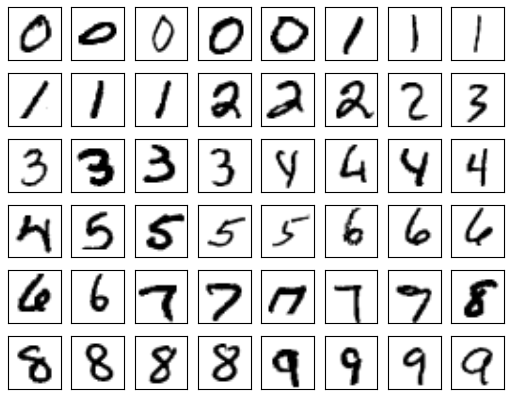

In [51]:
# import digits data
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

X = mnist['data']
y = mnist['target']
mnist.data.shape

fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    _ = axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap='gray_r');

Each of the 70,000 data points is a 784 dimensional vector, where each feature-dimension is a number from 0 to 255 representing pixel intensity. We will attempt to find a 2-dimensional spatial representation that conveys the similarities among the data points and keeps data in the same classes close together. <br>
<br>
Next I define a function to perform Classical MDS and to demonstrate its equivalence to PCA I plot their results on the digits dataset side by side.

In [60]:
def ClassicalMDS(dist_matrix, k):
    """Performs Classical Multidimensional Scaling
    Parameters
    ----------
    dist_matrix : Pairwise dissimilarity/distance matrix (n x n)
    k: Dimension of the output configuration
    
    Returns
    -------
    X : Matrix with columns as the output configuration vectors (k x n)
    """
    # get shape of distance matrix                                                                         
    n = dist_matrix.shape[0]
    
    # check distance matrix is symmetric
    if not np.allclose(np.transpose(dist_matrix),dist_matrix):
        print('Distance matrix must be symmetric')
        return
 
    # centering matrix
    C = np.identity(n) -(1/n)*np.ones((n,n))
 
    # compute gram matrix                                                                                    
    B = -(1/2)*C.dot(dist_matrix**2).dot(C)
 
    # solve for eigenvectors and eigenvalues and sort descending                                                   
    w, v = np.linalg.eigh(B)                                                  
    idx   = np.argsort(w)[::-1]
    eigvals = w[idx]
    eigvecs = v[:,idx]
     
    # select k largest eigenvalues and eigenvectors                      
    Lambda  = np.diag(np.sqrt(eigvals[:k]))
    V  = eigvecs[:,:k]
    X  = np.dot(Lambda, np.transpose(V))
    X = np.transpose(X)

    return X

In [168]:
# get random subset of digits data
sample = np.random.permutation(mnist.data.shape[0])[:1000]
data = mnist.data[sample]
labels = mnist.target[sample]

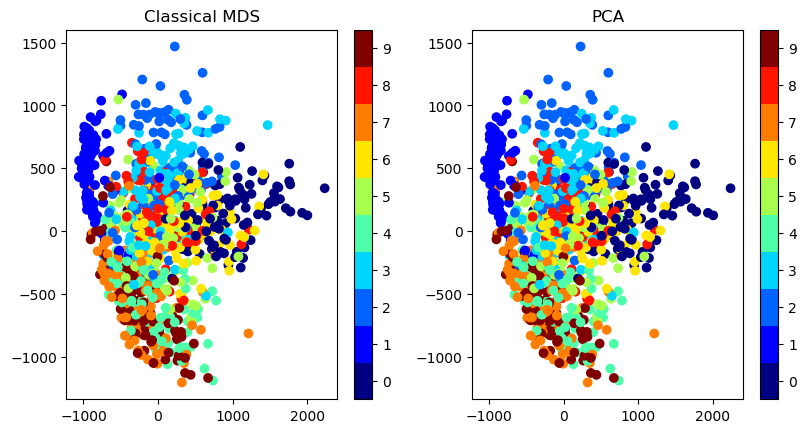

In [173]:
# get a subset of the mnist dataset
np.random.seed(0)
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# compute pairwise distance matrix with sklearn
D = pairwise_distances(data)

# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1)
# plot results of MDS
X = ClassicalMDS(pairwise_distances(data), 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);
plt.title('Classical MDS')

# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2)
clf = PCA(n_components=2)
X_pca = clf.fit_transform(data)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.title('PCA');

The results are the same for PCA and Classical MDS, although they may be off by a rotational degree of freedom due to underlying randomness in the implementations. 
<br>
Classical MDS does a decent job of keeping similar digits clustered together in the plane. It seems that the 0 and the 1 groups were respectively clustered the closest together. The 0's and 1's are also the furthest apart which makes sense considering they have quite different visual structures.

We now use MDS from the `sklearn.manifold` library

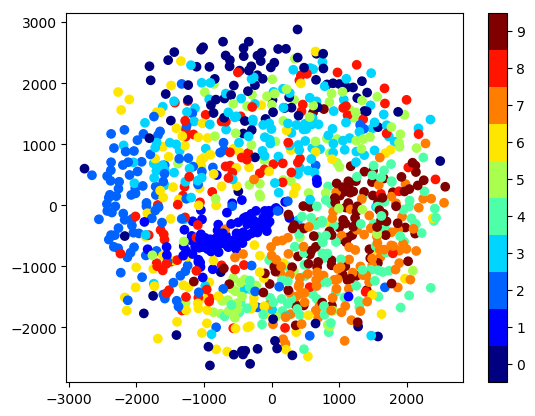

In [174]:
from sklearn.manifold import MDS

model = MDS(n_components=2)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=labels, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

The scikit-learn implementation uses a variation of the metric MDS algorithm called SMACOF that seems to perform better than the previous classical MDS implementation. There is more apparent segmentation of the digits into the various clusters.

Next, we apply MDS to some correlation data for various crimes in the United States (Borg & Groenen, 1997).

In [16]:
murder = np.array([1.00, 0.52, 0.34, 0.81, 0.28, 0.06, 0.11])
rape = np.array([0.52, 1.00, 0.55, 0.70, 0.68, 0.60, 0.44])
robbery = np.array([0.34, 0.55, 1.00, 0.56, 0.62, 0.44, 0.62])
assault = np.array([0.81, 0.70, 0.56, 1.00, 0.52, 0.32, 0.33])
burglary = np.array([0.28, 0.68, 0.62, 0.52, 1.00, 0.80, 0.70])
larceny = np.array([0.06, 0.60, 0.44, 0.32, 0.80, 1.00, 0.55])
auto_theft = np.array([0.11, 0.44, 0.62, 0.33, 0.70, 0.55, 1.00])

crime_matrix = np.array([murder, rape, robbery, assault, burglary, larceny, auto_theft])
crime_matrix
crime_matrix.shape

array([[1.  , 0.52, 0.34, 0.81, 0.28, 0.06, 0.11],
       [0.52, 1.  , 0.55, 0.7 , 0.68, 0.6 , 0.44],
       [0.34, 0.55, 1.  , 0.56, 0.62, 0.44, 0.62],
       [0.81, 0.7 , 0.56, 1.  , 0.52, 0.32, 0.33],
       [0.28, 0.68, 0.62, 0.52, 1.  , 0.8 , 0.7 ],
       [0.06, 0.6 , 0.44, 0.32, 0.8 , 1.  , 0.55],
       [0.11, 0.44, 0.62, 0.33, 0.7 , 0.55, 1.  ]])

(7, 7)

We use this correlation matrix as the pairwise similarity matrix so we can simply input this correlation data into the MDS algorithm. A good spatial representation will keep data points with high correlations closer to each other.

array([[-0.79745602, -0.61060277],
       [-0.26242261,  0.29569887],
       [ 0.1867529 , -0.29584503],
       [-0.63148091, -0.10295661],
       [ 0.26432209,  0.37745123],
       [ 0.57597632,  0.46180055],
       [ 0.66430823, -0.12554625]])

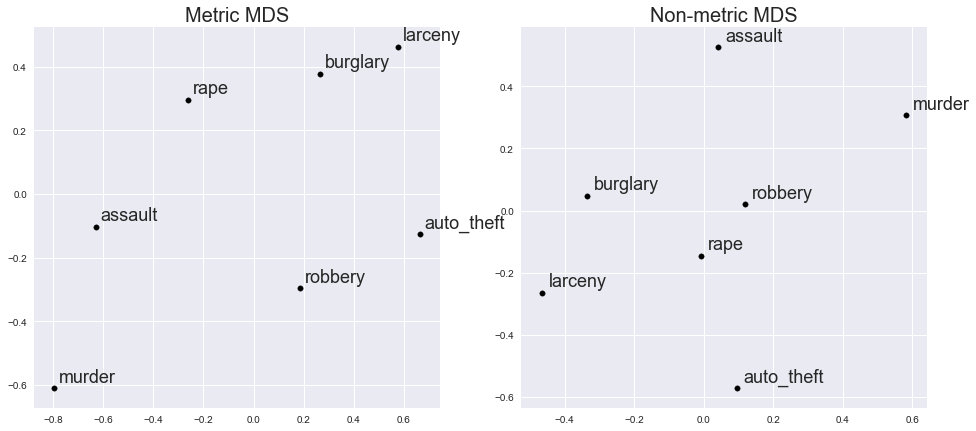

In [118]:
# set random seed
np.random.seed(0)
plt.style.use('seaborn')
# metric MDS
model = MDS(n_components=2)
X = model.fit_transform(crime_matrix)
X
labels = ['murder', 'rape', 'robbery', 'assault', 'burglary', 'larceny', 'auto_theft']
# plot results
_ = plt.figure(figsize=(16,7))
_ = plt.subplot(1,2,1)
_ = plt.scatter(X[:, 0], X[:, 1], c='black', s=30)
_ = plt.title('Metric MDS', size=20)
for i in range(len(labels)):
    _ = plt.text(X[i][0]+0.02, X[i][1]+0.02, s=labels[i], size=18)

# non-metric MDS
_ = plt.subplot(1,2,2)
model = MDS(n_components=2, metric=False)
proj = model.fit_transform(crime_matrix)
labels = ['murder', 'rape', 'robbery', 'assault', 'burglary', 'larceny', 'auto_theft']
# plot results
_ = plt.scatter(proj[:, 0], proj[:, 1], c='black', s=30)
_ = plt.title('Non-metric MDS', size=20)
for i in range(len(labels)):
    _ = plt.text(proj[i][0]+0.02, proj[i][1]+0.02, s=labels[i], size=18)

The 2-d representation does a pretty good job of spatially displaying the similarities between the different crimes. There's not a lot of noticeable difference for the metric vs. non-metric results. Looking at the metric MDS projection, the y-axis might represent the personal vs. impersonal nature of the crimes and the x-axis might represent the level of violence inherent in the crime. As the data goes from the top right to the bottom left, the crimes get more personal and violent. 

Using the pairwise distances between US cities, we can use MDS to try and recreate a two dimensional representation that accurately portrays the spatial relationships in the United States.

In [17]:
import pandas as pd
cities = pd.read_csv('C:/Users/dreww/Desktop/manifolds/cities_df.csv')
cities.head()
labels = list(cities.columns[1:])
cities = cities.iloc[:,1:]
dist_cities = np.array(cities)

,Unnamed: 0,Atlanta,Chicago,Denver,Houston,LosAngeles,Miami,NewYork,SanFrancisco,Seattle,Washington.DC
0,Atlanta,0,587,1212,701,1936,604,748,2139,2182,543
1,Chicago,587,0,920,940,1745,1188,713,1858,1737,597
2,Denver,1212,920,0,879,831,1726,1631,949,1021,1494
3,Houston,701,940,879,0,1374,968,1420,1645,1891,1220
4,LosAngeles,1936,1745,831,1374,0,2339,2451,347,959,2300


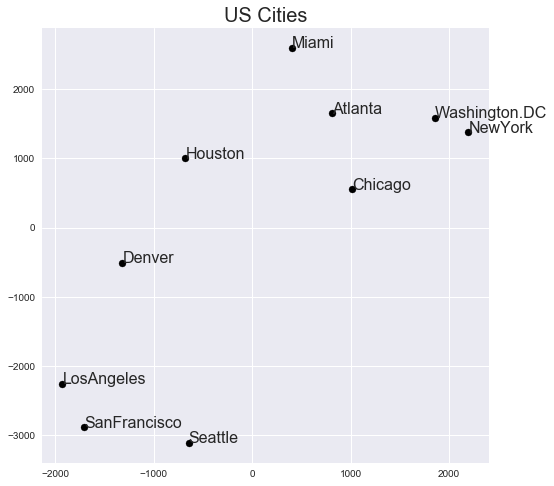

In [19]:
# metric MDS
np.random.seed(0)
model = MDS(n_components=2)
X = model.fit_transform(dist_cities)
# plot results
_ = plt.figure(figsize=(8,8))
_ = plt.scatter(X[:, 0], X[:, 1], c='black')
_ = plt.title('US Cities', size=20)
for i in range(len(labels)):
    _ = plt.text(X[i][0]+0.02, X[i][1]+0.02, s=labels[i], size=16)

We can do the same for European cities

In [20]:
eurodist = pd.read_csv('C:/Users/dreww/Desktop/manifolds/eurodist.csv')
eurodist.head()
labels = list(eurodist.columns)

,Athens,Barcelona,Brussels,Calais,Cherbourg,Cologne,Copenhagen,Geneva,Gibraltar,Hamburg,...,Lisbon,Lyons,Madrid,Marseilles,Milan,Munich,Paris,Rome,Stockholm,Vienna
0,0,3313,2963,3175,3339,2762,3276,2610,4485,2977,...,4532,2753,3949,2865,2282,2179,3000,817,3927,1991
1,3313,0,1318,1326,1294,1498,2218,803,1172,2018,...,1305,645,636,521,1014,1365,1033,1460,2868,1802
2,2963,1318,0,204,583,206,966,677,2256,597,...,2084,690,1558,1011,925,747,285,1511,1616,1175
3,3175,1326,204,0,460,409,1136,747,2224,714,...,2052,739,1550,1059,1077,977,280,1662,1786,1381
4,3339,1294,583,460,0,785,1545,853,2047,1115,...,1827,789,1347,1101,1209,1160,340,1794,2196,1588


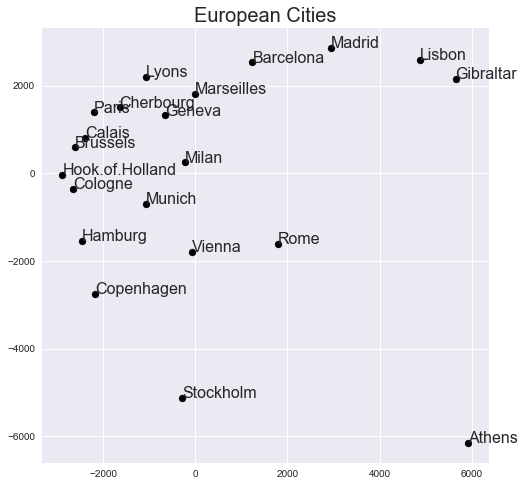

In [25]:
np.random.seed(0)
euro_cities = np.array(eurodist)
model = MDS(n_components=2)
X = model.fit_transform(euro_cities)
# plot results
_ = plt.figure(figsize=(8,8))
_ = plt.scatter(X[:, 0], X[:, 1], c='black')
_ = plt.title('European Cities', size=20)
for i in range(len(labels)):
    _ = plt.text(X[i][0]+0.02, X[i][1]+0.02, s=labels[i], size=16)

In practice, multidimensional scaling has a broad range of applications and it offers a significant capability to produce spatial representations, even for qualitative similarity comparisons when we only need to input a set of pairwise similarity comparisons. However, MDS is quite limited by the fact that it considers the entire global set of pairwise distances. This significantly limits the ability of MDS to learn non-linear manifold structures. As we will see with the next algorithms, methods based only on the local neighborhoods can more effectively learn the intrinsic structure of the data. <br>
<br>
**Note:** verifying the geographical accuracy of these last projections will, of course, be left as an exercise to the reader 

In [1]:
from IPython.core.display import HTML

def css_styling():
    styles = open("custom_style.css", "r").read()
    return HTML(styles)
css_styling()

___

### References


-  [1] https://en.wikipedia.org/wiki/Multidimensional_scaling
-  [2] https://en.wikipedia.org/wiki/Centering_matrix
-  [3] Wickelmaier, Florian. "An introduction to MDS." Sound Quality Research Unit, Aalborg University, Denmark (2003)

### Notes
<span id="fn1"> **1:**</span>
Perhaps the most fascinating discussion of Multidimensional scaling comes from the cognitive scientist RN Shepard, who proposed a 'Universal law of generalization' to describe perception and mental representations in terms of an underlying mathematical structure, such that the universal laws governing the universe might be reflected in laws that govern conscious minds. He states "Invariance of the laws is achieved by constructing the representational spaces from psychological rather than physical data (using multidimensional scaling) and from considerations of geometry, group theory, and symmetry" (RN Shepard 2004). Shepard also says "These empirical regularities are mathematically derivable from universal principles of natural kinds and probabilistic geometry that may, through evolutionary internalization, tend to govern the behaviors of all sentient organisms" (RN Shepard 1987)